# SQL - Bonus
----

#### Note
* Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the code below to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:

In [198]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas as pd
import numpy as np

from sqlalchemy import create_engine

# Import Password
from password import SQL_pw

engine = create_engine('postgres://postgres:'+ (SQL_pw) +'@localhost:5432/Employees')
connection = engine.connect()

In [199]:
salaryData_df = pd.read_sql('SELECT salaries.emp_no, salaries.salary, titles.title FROM salaries INNER JOIN titles on salaries.emp_no = titles.emp_no ', connection)
salaryData_df.head()

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10005,78228,Senior Staff
2,10005,78228,Staff
3,10010,72488,Engineer
4,10011,42365,Staff


## Create a histogram to visualize the most common salary ranges for employees

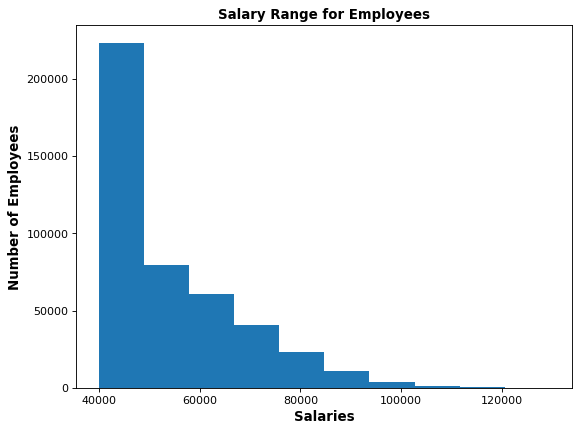

In [206]:
salaries = salaryData_df['salary']
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Salary Range for Employees", fontsize='large', fontweight='bold')
plt.hist(salaries)
plt.xlabel('Salaries', fontsize='large', fontweight='bold')
plt.ylabel('Number of Employees', fontsize='large', fontweight='bold')
plt.show()

In [200]:
avgSalary_df = salaryData_df.groupby('title').mean()
avgSalary_df.head()


,emp_no,salary
title,,
Assistant Engineer,251495.398533,48493.204786
Engineer,252943.159987,48539.781423
Manager,110780.833333,51531.041667
Senior Engineer,253034.375949,48506.751806
Senior Staff,253423.367183,58503.286614


## Create a bar chart of average salary by title

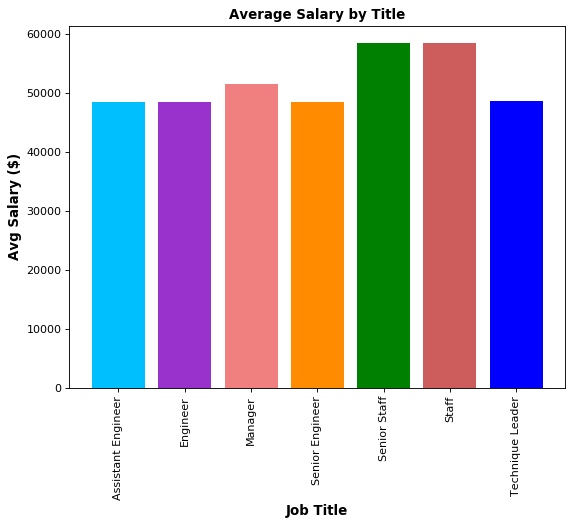

In [210]:
avgSalary = avgSalary_df.reset_index()
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
xTitle = avgSalary['title']
ySalary = avgSalary['salary']
plt.bar(xTitle, ySalary, align='center', color=['deepskyblue','darkorchid','lightcoral','darkorange','green','indianred','blue'])
plt.xticks(xTitle, rotation='vertical')
plt.title('Average Salary by Title', fontsize='large', fontweight='bold')
plt.xlabel('Job Title', fontsize='large', fontweight='bold')
plt.ylabel('Avg Salary ($)', fontsize='large', fontweight='bold')
plt.show()